In [81]:
import re
ma = re.match(r'\[[\w]\]','[a]')   #\[   \] 要匹配[当是是a-zA-Z0-9] ,例：[a]
print ma.group()
ma = re.match(r'[\w]','a')
print ma.group()

[a]
a


In [18]:
re.findall(r'cat', 'dog cat dog cat cat1 catcat')

['cat', 'cat', 'cat', 'cat', 'cat']

In [83]:
import re

quickbrownfox = "A quick brown fox jumps over the lazy dog."
split_regex = r'\W+'

# T之前废了那么大的劲来做这个，没想到还有findall () 这么一个简单的方法
def simple_tokenize(string):
    string= string.lower()
    string = string.strip('\s')
    #print string
    p = re.compile(split_regex,re.I) #根据空格或者数字拆分字符串
    out=p.split(string)
    if(out[0] == ''):
        del out[0]
    return out


def simple_tokenize2(string):
    string= string.lower()
    return re.findall(r'\w+' , string)

print simple_tokenize("   !!.,.!!123A/456_B/789C.123A")

print simple_tokenize2("   !!.,.!!123A/456_B/789C.123A")

   !!.,.!!123a/456_b/789c.123a
['123a', '456_b', '789c', '123a']
['123a', '456_b', '789c', '123a']


In [11]:
from pylab import *
%matplotlib inline
import pandas as pd
df = pd.DataFrame( { 'a' : [1, 2, 3, 4], 'b': [ 'w', 'x', 'y', 'z'] })

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
a    4 non-null int64
b    4 non-null object
dtypes: int64(1), object(1)
memory usage: 96.0 bytes


In [10]:
df[1:3]

,a,b
1,2,x
2,3,y


In [11]:
df.describe()

,a
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [13]:
log_df = pd.read_csv("/home/bill/dataScience/wc_day6_1_sample.csv",
                     names=['ClientID', 'Date', 'Time', 'URL', 'ResponseCode', 'Size'],
                     na_values=['-'])

In [16]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 6 columns):
ClientID        200000 non-null int64
Date            200000 non-null object
Time            200000 non-null object
URL             200000 non-null object
ResponseCode    199997 non-null float64
Size            191333 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.7 MB


In [18]:
log_df[85:91]

,ClientID,Date,Time,URL,ResponseCode,Size
85,13325,01/May/1998,14:37:02,/english/nav_top_inet.html,200,374
86,13401,01/May/1998,14:45:00,/images/teams_hm_bg.jpg,200,18794
87,13447,01/May/1998,14:43:47,/images/home_eng_phrase.gif,200,2861
88,13578,01/May/1998,20:57:48,/english/images/news_btn_press_off.gif,200,1740
89,14179,01/May/1998,15:25:11,/english/venues/cities/images/denis/18collect.gif,200,729
90,14641,01/May/1998,15:50:26,/images/cal_nant.gif,200,359


In [19]:
may1_df = log_df[log_df['Date'] == '01/May/1998']
may1_df.head()

,ClientID,Date,Time,URL,ResponseCode,Size
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200,169
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200,7027
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304,0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304,NaN
5,13649,01/May/1998,14:55:01,/images/hm_anime_e.gif,200,15609


In [20]:
url_codes = log_df[['URL', 'ResponseCode']]
url_codes.head(5)

,URL,ResponseCode
0,/images/11104.gif,200
1,/images/ligne.gif,200
2,/english/individuals/player111503.htm,200
3,/french/frntpage.htm,304
4,/english/images/nav_sitemap_off.gif,304


In [32]:
multi_grouped = log_df.groupby(['ResponseCode','Date'])
multi_grouped.ngroups
#multi_grouped.groups.keys()
multi_grouped.describe()#详细的所有的
#multi_grouped.median()#中值
#multi_grouped.get_group((206,'01/May/1998')).head()

ClientID            Size
ResponseCode Date                                            
200          01/May/1998 count  159347.000000   159347.000000
                         mean    10847.304756     8541.691114
                         std      5923.825686    82955.930507
                         min         5.000000       42.000000
                         25%      5907.000000      333.000000
                         50%     10923.000000      937.000000
                         75%     15628.000000     2843.000000
                         max     34794.000000  2891887.000000
             30/Apr/1998 count   14577.000000    14577.000000
                         mean     1298.500583     7348.920834
                         std      2709.072518    70241.519291
                         min         0.000000       42.000000
                         25%       550.000000      327.000000
                         50%      1095.000000      934.000000
                         75%      1611.000000     2861.000000
                         max     34770.000000  2100714.000000
206          01/May/1998 count     346.000000      346.000000
                         mean    11308.895954    96239.950867
                         std      6506.183643   341296.186671
                         min        49.000000        6.000000
                         25%      5279.000000     1414.250000
                         50%     11475.500000    10125.500000
                         75%     16324.500000    33018.500000
                         max     34772.000000  2020644.000000
             30/Apr/1998 count      33.000000       33.000000
                         mean      935.909091    20969.484848
                         std       591.658071    43623.255079
                         min        16.000000      426.000000
                         25%       551.000000     1639.000000
                         50%       871.000000    13629.000000
...                                       ...             ...
400          30/Apr/1998 std         0.000000        0.000000
                         min       781.000000      147.000000
                         25%       781.000000      147.000000
                         50%       781.000000      147.000000
                         75%       781.000000      147.000000
                         max       781.000000      147.000000
404          01/May/1998 count     198.000000      198.000000
                         mean     8885.484848      267.196970
                         std      5117.399234       63.111107
                         min       130.000000      207.000000
                         25%      5872.000000      207.000000
                         50%      7774.000000      207.000000
                         75%     12558.000000      334.000000
                         max     20644.000000      368.000000
             30/Apr/1998 count      17.000000       17.000000
                         mean     1048.470588      290.294118
                         std       645.656073       63.515515
                         min        85.000000      207.000000
                         25%       426.000000      207.000000
                         50%      1113.000000      333.000000
                         75%      1377.000000      338.000000
                         max      2160.000000      340.000000
500          01/May/1998 count       5.000000        5.000000
                         mean    10207.400000      305.000000
                         std      5023.652685        0.000000
                         min      7195.000000      305.000000
                         25%      7195.000000      305.000000
                         50%      7211.000000      305.000000
                         75%     10648.000000      305.000000
                         max     18788.000000      305.000000

[104 rows x 2 columns]

In [35]:
log_df[log_df['ResponseCode'] == 404].head()

,ClientID,Date,Time,URL,ResponseCode,Size
275,384,30/Apr/1998,22:15:19,/english/welcoming/suppliers/laposte.html,404,327
1151,7714,01/May/1998,13:36:34,/english/news/10095.htm,404,329
1731,18116,01/May/1998,18:53:23,/images/btn.openpage.white.gif,404,337
1778,5872,01/May/1998,05:40:39,/images/inside.gif,404,207
4032,15461,01/May/1998,16:39:11,/plweb-hp/images/srch_nav.gif,404,207


In [73]:
#方法一
#log404 = log_df[log_df['ResponseCode'] == 404]
#pattern = r'30/Apr/*'
#len(log404[log404['Date'].str.contains(pattern)])

#方法二
group404 = log_df.groupby(['ResponseCode' , 'Date'])
group404.size()

ResponseCode  Date       
200           01/May/1998    159347
              30/Apr/1998     14577
206           01/May/1998       346
              30/Apr/1998        33
302           01/May/1998        13
              30/Apr/1998         1
304           01/May/1998     23390
              30/Apr/1998      2067
400           01/May/1998         1
              30/Apr/1998         2
404           01/May/1998       198
              30/Apr/1998        17
500           01/May/1998         5
dtype: int64

In [74]:
log_df['DateTime'] = pd.to_datetime(log_df.apply(lambda row: row['Date'] + ' ' + row['Time'], axis=1))

In [10]:
hour_grouped = log_df.groupby(lambda row: log_df['DateTime'][row].hour)
hour_grouped.ngroups
#output :24 ?   重新运行就得吧之前的再运行一次了

NameError: name 'log_df' is not defined

In [10]:
import pandas as pd
import random
b= list(1000)
for i in range(1000):
    b[i] = random.randint(0,100)
    
pd.DataFrame({'b' : b})
rand_df = pd.DataFrame({'a' : random.rand(100)})
rand_df.dtypes
rand_df.plot()
rand_df.hist()

TypeError: 'int' object is not iterable

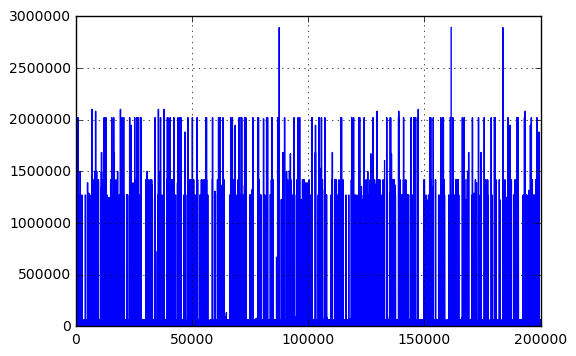

In [53]:
'''rand_df = pd.DataFrame({'a' : randn(100)})
rand_df.dtypes
rand_df.plot()
rand_df.hist()
'''

log_df.dtypes
log_df['Size'].plot()